In [0]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np, math,re,random
import scipy.spatial
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
...
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR, LogisticRegression as LogR 
from sklearn.feature_extraction.text import TfidfTransformer
#from pomegranate import *
from scipy.stats import expon
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
import re
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.svm import SVR

In [0]:
def random_gen(num):
  global no_of_ele
  ran=[]
  ran=random.sample(range(1, 300), num)
  return ran
def random_gen1(num):
  ran=[]
  ran=random.sample(range(1, 800), num)
  return ran
def gen_train_data(ran,matrix):
    train_data=[]
    for i in ran:
        train_data.append(matrix[i])
    return train_data

In [0]:
def preproc(X):
  X_scaled = preprocessing.scale(X)
  return X_scaled

In [0]:
no_of_ele=0
def taking_data():
  global no_of_ele
  with open('/content/gdrive/My Drive/datasets/prnnass2/german.data-numeric') as file:
      array2d = [[digit for digit in line.split()] for line in file]

  #array2d=array2d[:149]
  matrix=[]
  for i in range(len(array2d)):
    temp=[]
    for j in range (25):
      temp.append(float(array2d[i][j]))
    matrix.append(temp)

  #print(matrix)
  matrix=np.array(matrix)
  no_of_ele=len(matrix)
  print(matrix.shape)
  class1=[]
  class2=[]
  for i in range(len(matrix)):
    if matrix[i][24]==1:
      class1.append(matrix[i])
    else:
      class2.append(matrix[i])

  
  ran=random_gen(100)


  train_data=[]
  test_data=[]
  for i in range(len(class1)):
    if i in ran :
        test_data.append(class1[i])
    else:
        train_data.append(class1[i])
  for i in range(len(class2)):
    if i in ran :
        test_data.append(class2[i])
    else:
        train_data.append(class2[i])
  # ran=random_gen(200)
  # for i in range(1000):
  #   if i in ran:
  #     test_data.append(matrix[i])
  #   else:
  #     train_data.append(matrix[i])

  train_data=np.array(train_data)
  test_data=np.array(test_data)

  return 25,train_data,test_data


In [0]:
def least_sqvsLogistic():
    global no_of_ele
    t,t_d,matrix_test=taking_data()
    result=[]
    result2=[]
    G=[10,50,100,500]
    for i in G:
        num=random_gen1(i)
        train_data=gen_train_data(num,t_d)
        train_data=np.array(train_data)
        print(train_data.shape)
        y_pred = LR().fit(X=preproc(train_data[:,:t-1]),y=train_data[:,t-1]).predict(preproc(matrix_test[:,:t-1]))
        y_pred2=[]
        for z in y_pred:
          if z>.5:
            y_pred2.append(1)
          else:
            y_pred2.append(-1)
        y_pred1=LogR().fit(X=preproc(train_data[:,:t-1]),y=train_data[:,t-1]).predict(preproc(matrix_test[:,:t-1]))
        #print(matrix_test[500:550,2])
        #print(y_pred[500:550])
        
        result2.append(1-(((matrix_test[:,t-1] != y_pred1).sum())/len(matrix_test)))
        result.append(1-(((matrix_test[:,t-1] != y_pred2).sum())/len(matrix_test)))
       # result2.append(1-((matrix_test[:,2] != y_pred1).sum())/len(matrix_test))
    plt.plot(G,result,color='red')
    plt.plot(G,result2,color='blue')

    plt.show()

least_sqvsLogistic()

(1000, 25)


TypeError: ignored

(1000, 25)
(200, 25)
(200, 2)
(100, 2)


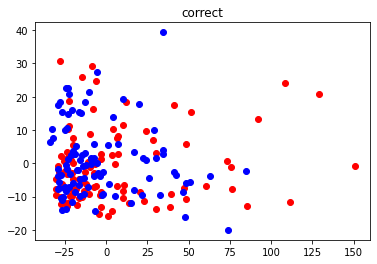

0.001762499999999997
0.002712499999999999
(61, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


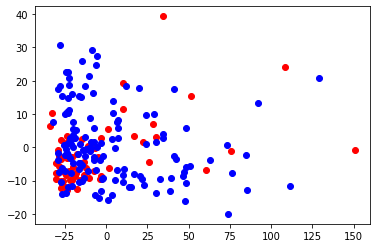

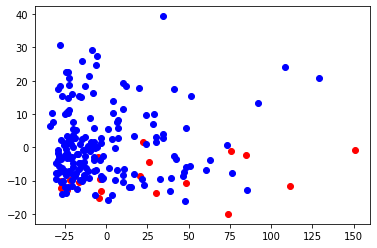

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.0015137500000000019
0.009581249999999989
(57, 2)


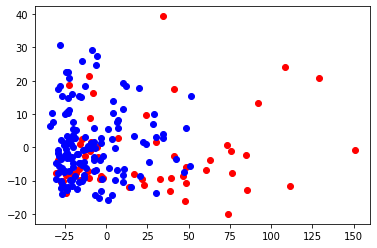

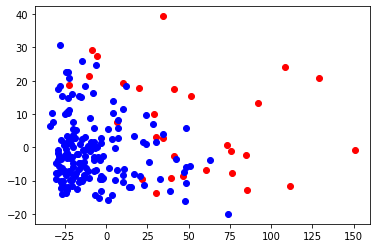

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.0015975000000000002
0.004268749999999999
(39, 2)


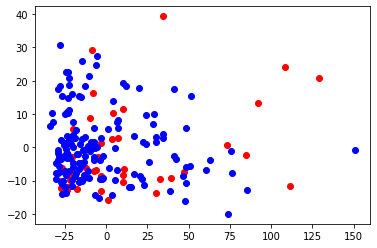

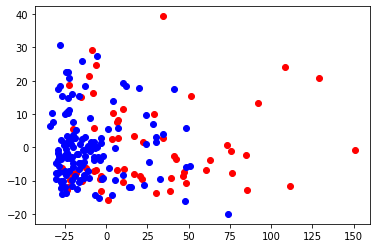

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.0005924999999999993
0.0066075000000000075
(45, 2)


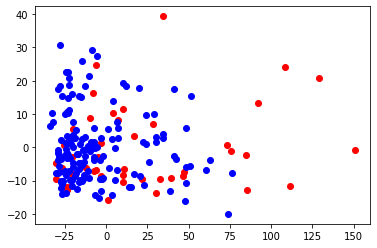

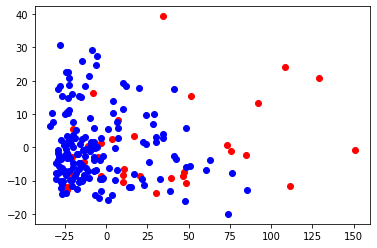

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


7.000000000000012e-05
0.006465
(33, 2)


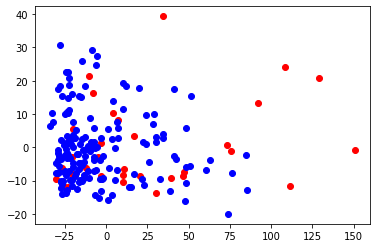

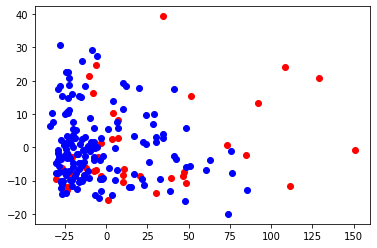

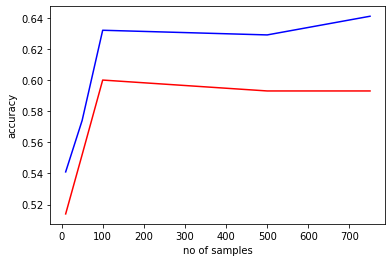

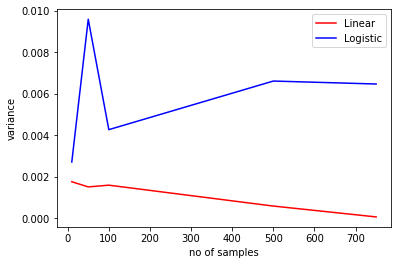

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)


def least_sqvsLogistic_g():
    global no_of_ele
    t,t_d,matrix_test=taking_data()
   # print("len of data"+str(no_of_ele))

    test=pca.fit_transform(matrix_test[:,:t-1])
    print(matrix_test.shape)
    print(test.shape)
    ppos=[]
    pneg=[]
  
    for z in range(len(test)):
      if matrix_test[z,t-1]>1.5:
        ppos.append(test[z])
      else:
        pneg.append(test[z])
    
    
    ppos=np.array(ppos)
    
    pneg=np.array(pneg)
    
    print(ppos.shape)
    plt.scatter(ppos[:,0],ppos[:,1],color='red')
    plt.scatter(pneg[:,0],pneg[:,1],color='blue')
    plt.title('correct')
    plt.show()
        
    result=[]
    result2=[]
    G=[10,50,100,500,750]
    v1=[]
    v2=[]
    for i in G:
        num1=random_gen1(i)
        num2=random_gen1(i)
        num3=random_gen1(i)
        num4=random_gen1(i)
        num5=random_gen1(i)
        train_data1=gen_train_data(num1,t_d)
        train_data2=gen_train_data(num2,t_d)
        train_data3=gen_train_data(num3,t_d)
        train_data4=gen_train_data(num4,t_d)
        train_data5=gen_train_data(num5,t_d)
        # train_data=[]
        # for j in range(i):
        #   train_data.append((train_data1[j]+train_data2[j]+train_data3[j]+train_data4[j]+train_data5[j])/5)

        train_data1=np.array(train_data1)
        train_data2=np.array(train_data2)
        train_data3=np.array(train_data3)
        train_data4=np.array(train_data4)
        train_data5=np.array(train_data5)



        #print(train_data.shape)
        y_pred01 = LR().fit(X=train_data1[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred02 = LR().fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred03 = LR().fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred04 = LR().fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred05 = LR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred21=[]
        y_pred22=[]
        y_pred23=[]
        y_pred24=[]
        y_pred25=[]

        for z in y_pred01:
          if z>1.5:
            y_pred21.append(2)
          else:
            y_pred21.append(1)
        for z in y_pred02:
          if z>1.5:
            y_pred22.append(2)
          else:
            y_pred22.append(1)

        for z in y_pred03:
          if z>1.5:
            y_pred23.append(2)
          else:
            y_pred23.append(1)
        for z in y_pred04:
          if z>1.5:
            y_pred24.append(2)
          else:
            y_pred24.append(1)
        for z in y_pred05:
          if z>1.5:
            y_pred25.append(2)
          else:
            y_pred25.append(1)
        y_pred11=LogR().fit(X=train_data1[:,:t-1],y=train_data1[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred12=LogR().fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred13=LogR().fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred14=LogR().fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred15=LogR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])
        #print(matrix_test[500:550,2])
        #print(y_pred[500:550])

        #for accuracy

        res11=1-(((matrix_test[:,t-1] != y_pred11).sum())/len(matrix_test))
        res12=1-(((matrix_test[:,t-1] != y_pred12).sum())/len(matrix_test))
        res13=1-(((matrix_test[:,t-1] != y_pred13).sum())/len(matrix_test))
        res14=1-(((matrix_test[:,t-1] != y_pred14).sum())/len(matrix_test))
        res15=1-(((matrix_test[:,t-1] != y_pred15).sum())/len(matrix_test))
        res21=1-(((matrix_test[:,t-1] != y_pred21).sum())/len(matrix_test))
        res22=1-(((matrix_test[:,t-1] != y_pred22).sum())/len(matrix_test))
        res23=1-(((matrix_test[:,t-1] != y_pred23).sum())/len(matrix_test))
        res24=1-(((matrix_test[:,t-1] != y_pred24).sum())/len(matrix_test))
        res25=1-(((matrix_test[:,t-1] != y_pred25).sum())/len(matrix_test))

        #for f1 score

        # res11=f1_score(matrix_test[:,t-1],y_pred11)
        # res12=f1_score(matrix_test[:,t-1],y_pred12)
        # res13=f1_score(matrix_test[:,t-1],y_pred13)
        # res14=f1_score(matrix_test[:,t-1],y_pred14)
        # res15=f1_score(matrix_test[:,t-1],y_pred15)
        # res21=f1_score(matrix_test[:,t-1],y_pred21)
        # res22=f1_score(matrix_test[:,t-1],y_pred22)
        # res23=f1_score(matrix_test[:,t-1],y_pred23)
        # res24=f1_score(matrix_test[:,t-1],y_pred24)
        # res25=f1_score(matrix_test[:,t-1],y_pred25)
        
        
        
        res1=(res11+res12+res13+res14+res15)/5
        res2=(res21+res22+res23+res24+res25)/5

        var1=((res11-res1)**2+(res12-res1)**2+(res13-res1)**2+(res14-res1)**2+(res11-res1)**2)/4
        var2=((res21-res2)**2+(res22-res2)**2+(res23-res2)**2+(res24-res2)**2+(res21-res2)**2)/4
        print(var1)
        print(var2)
        v1.append(var1)
        v2.append(var2)

        ppos=[]
        pneg=[]
        qpos=[]
        qneg=[]
        # from sklearn.decomposition import PCA
        # pca=PCA(n_components=2) 
        # if n==3:
        #   matrix_test

        for z in range(len(y_pred22)):
          if y_pred22[z]>1.5:
            ppos.append(test[z,:t-1])
          else:
            pneg.append(test[z,:t-1])
        for z in range(len(y_pred11)):
          if y_pred11[z]>1.5:
            qpos.append(test[z,:t-1])
          else:
            qneg.append(test[z,:t-1])
        
  
        ppos=np.array(ppos)
        qpos=np.array(qpos)
        pneg=np.array(pneg)
        qneg=np.array(qneg)
        print(ppos.shape)
        if len(ppos)>1.5:
          plt.scatter(ppos[:,0],ppos[:,1],color='red')
        if len(pneg)>1.5:
          plt.scatter(pneg[:,0],pneg[:,1],color='blue')
        plt.show()
        if len(qpos)>1.5:
          plt.scatter(qpos[:,0],qpos[:,1],color='red')
        if len(qneg)>1.5:
          plt.scatter(qneg[:,0],qneg[:,1],color='blue')
        plt.show()
        #plt.plot(G,result2,color='blue')
        # plt.legend([str,'Logistic'])
        # plt.xlabel('no of samples')
        # plt.ylabel('accuracy')


        result2.append(res1)
        result.append(res2)
       # result2.append(1-((matrix_test[:,2] != y_pred1).sum())/len(matrix_test))
    
    plt.plot(G,result,color='red')
    plt.plot(G,result2,color='blue')
    #plt.legend(['Linear','Logistic'])
    plt.xlabel('no of samples')
    plt.ylabel('accuracy')


    plt.show()
    plt.plot(G,v1,color='red')
    plt.plot(G,v2,color='blue')
    plt.legend(['Linear','Logistic'])
    plt.xlabel('no of samples')
    plt.ylabel('variance')


    plt.show()
least_sqvsLogistic_g()

In [0]:
def random_gen2(num):
  ran=[]
  ran=random.sample(range(1, 199), num)
  return ran

def gen_train_data1(ran,matrix):
    train_data=[]
    positive=[]
    negative=[]
    for i in range(len(matrix)):
      if matrix[i][24]==1:
        positive.append(matrix[i])
      else:
        negative.append(matrix[i])
    for i in ran:
        train_data.append(positive[i])
        train_data.append(negative[i])
    return train_data
    

(1000, 25)
(200, 25)
(200, 2)
(100, 2)


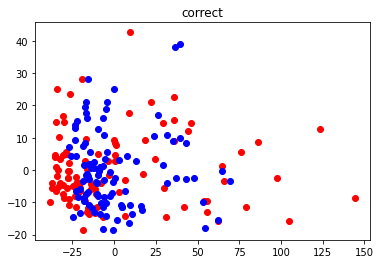

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.002893749999999999
0.003792499999999999
here(72, 2)


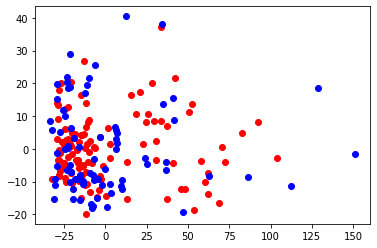

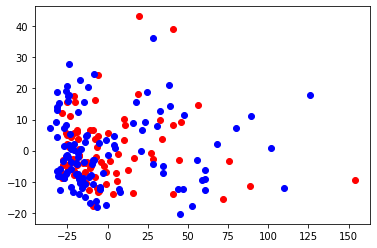

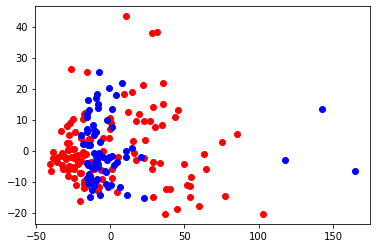

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.002258749999999999
0.003584999999999992
here(109, 2)


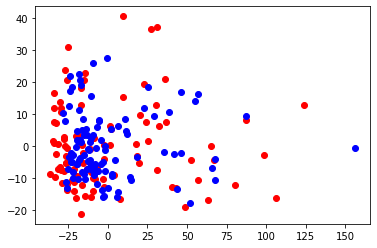

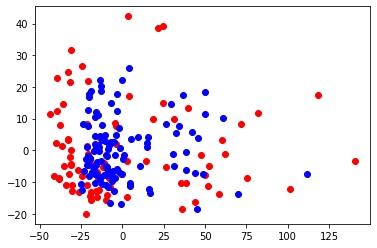

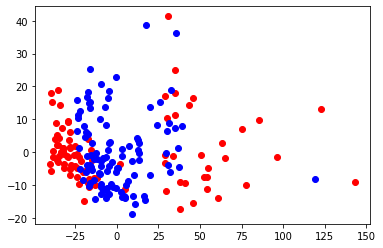

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.0003937499999999997
0.002612499999999994
here(106, 2)


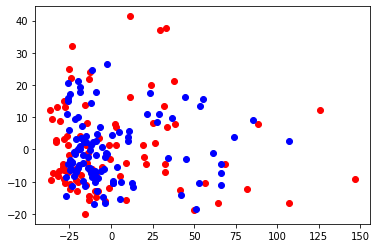

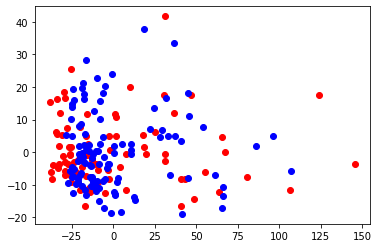

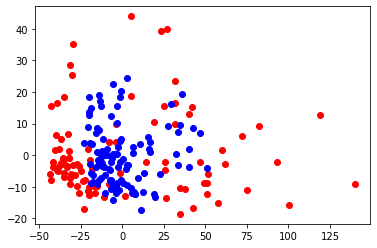

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


3.000000000000005e-05
0.002803750000000005
here(106, 2)


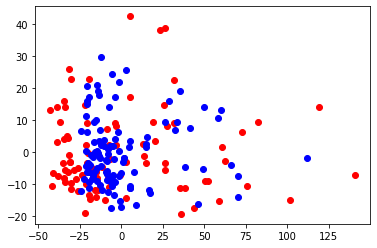

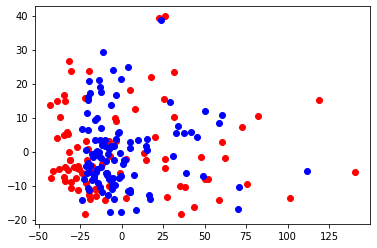

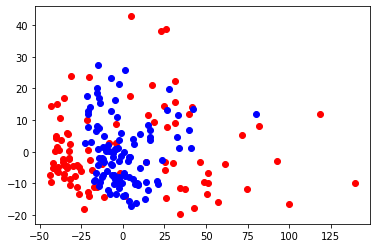

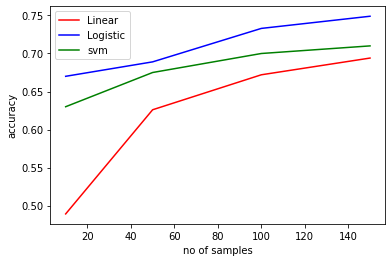

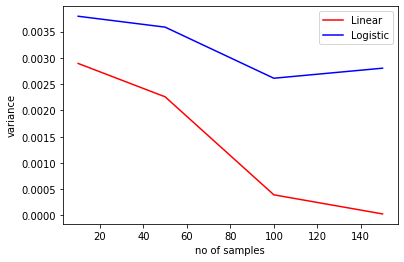

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)


def least_sqvsLogistic_g():
    global no_of_ele
    t,t_d,matrix_test=taking_data()
   # print("len of data"+str(no_of_ele))

    test=pca.fit_transform(matrix_test[:,:t-1])
    print(matrix_test.shape)
    print(test.shape)
    ppos=[]
    pneg=[]
  
    for z in range(len(test)):
      if matrix_test[z,t-1]>1.5:
        ppos.append(test[z])
      else:
        pneg.append(test[z])
    
    
    ppos=np.array(ppos)
    
    pneg=np.array(pneg)
    ppos=PCA(n_components=2).fit_transform(ppos)
    pneg=PCA(n_components=2).fit_transform(pneg)
    
    print(ppos.shape)
    plt.scatter(ppos[:,0],ppos[:,1],color='red')
    plt.scatter(pneg[:,0],pneg[:,1],color='blue')
    plt.title('correct')
    plt.show()
        
    result=[]
    result2=[]
    result5=[]
    G=[10,50,100,150]
    v1=[]
    v2=[]
    for i in G:
        num1=random_gen2(i)
        num2=random_gen2(i)
        num3=random_gen2(i)
        num4=random_gen2(i)
        num5=random_gen2(i)
        train_data1=gen_train_data1(num1,t_d)
        train_data2=gen_train_data1(num2,t_d)
        train_data3=gen_train_data1(num3,t_d)
        train_data4=gen_train_data1(num4,t_d)
        train_data5=gen_train_data1(num5,t_d)
        # train_data=[]
        # for j in range(i):
        #   train_data.append((train_data1[j]+train_data2[j]+train_data3[j]+train_data4[j]+train_data5[j])/5)

        train_data1=np.array(train_data1)
        train_data2=np.array(train_data2)
        train_data3=np.array(train_data3)
        train_data4=np.array(train_data4)
        train_data5=np.array(train_data5)



        #print(train_data.shape)
        y_pred01 = LR().fit(X=train_data1[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred02 = LR().fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred03 = LR().fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred04 = LR().fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred05 = LR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred21=[]
        y_pred22=[]
        y_pred23=[]
        y_pred24=[]
        y_pred25=[]

        for z in y_pred01:
          if z>1.5:
            y_pred21.append(2)
          else:
            y_pred21.append(1)
        for z in y_pred02:
          if z>1.5:
            y_pred22.append(2)
          else:
            y_pred22.append(1)

        for z in y_pred03:
          if z>1.5:
            y_pred23.append(2)
          else:
            y_pred23.append(1)
        for z in y_pred04:
          if z>1.5:
            y_pred24.append(2)
          else:
            y_pred24.append(1)
        for z in y_pred05:
          if z>0:
            y_pred25.append(2)
          else:
            y_pred25.append(1)
        y_pred11=LogR(class_weight="balanced").fit(X=train_data1[:,:t-1],y=train_data1[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred12=LogR(class_weight="balanced").fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred13=LogR(class_weight="balanced").fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred14=LogR(class_weight="balanced").fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred15=LogR(class_weight="balanced").fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])

        #print(matrix_test[500:550,2])
        #print(y_pred[500:550])
        y_pred51=SVR(C=4).fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])

        y_pred52=[]
        for z in y_pred51:
          if z>1.5:
            y_pred52.append(2)
          else:
            y_pred52.append(1)

        res11=1-(((matrix_test[:,t-1] != y_pred11).sum())/len(matrix_test))
        res12=1-(((matrix_test[:,t-1] != y_pred12).sum())/len(matrix_test))
        res13=1-(((matrix_test[:,t-1] != y_pred13).sum())/len(matrix_test))
        res14=1-(((matrix_test[:,t-1] != y_pred14).sum())/len(matrix_test))
        res15=1-(((matrix_test[:,t-1] != y_pred15).sum())/len(matrix_test))
        res21=1-(((matrix_test[:,t-1] != y_pred21).sum())/len(matrix_test))
        res22=1-(((matrix_test[:,t-1] != y_pred22).sum())/len(matrix_test))
        res23=1-(((matrix_test[:,t-1] != y_pred23).sum())/len(matrix_test))
        res24=1-(((matrix_test[:,t-1] != y_pred24).sum())/len(matrix_test))
        res25=1-(((matrix_test[:,t-1] != y_pred25).sum())/len(matrix_test))
        res5=1-(((matrix_test[:,t-1] != y_pred52).sum())/len(matrix_test))

        # res11=f1_score(matrix_test[:,t-1],y_pred11)
        # res12=f1_score(matrix_test[:,t-1],y_pred12)
        # res13=f1_score(matrix_test[:,t-1],y_pred13)
        # res14=f1_score(matrix_test[:,t-1],y_pred14)
        # res15=f1_score(matrix_test[:,t-1],y_pred15)
        # res21=f1_score(matrix_test[:,t-1],y_pred21)
        # res22=f1_score(matrix_test[:,t-1],y_pred22)
        # res23=f1_score(matrix_test[:,t-1],y_pred23)
        # res24=f1_score(matrix_test[:,t-1],y_pred24)
        # res25=f1_score(matrix_test[:,t-1],y_pred25)
        
        
        res1=(res11+res12+res13+res14+res15)/5
        res2=(res21+res22+res23+res24+res25)/5

        var1=((res11-res1)**2+(res12-res1)**2+(res13-res1)**2+(res14-res1)**2+(res11-res1)**2)/4
        var2=((res21-res2)**2+(res22-res2)**2+(res23-res2)**2+(res24-res2)**2+(res21-res2)**2)/4
        print(var1)
        print(var2)
        v1.append(var1)
        v2.append(var2)

        ppos=[]
        pneg=[]
        qpos=[]
        qneg=[]
        zpos=[]
        zneg=[]
        # from sklearn.decomposition import PCA
        # pca=PCA(n_components=2) 
        # if n==3:
        #   matrix_test

        for z in range(len(y_pred22)):
          if y_pred22[z]>1.5:
            ppos.append(test[z,:t-1])
          else:
            pneg.append(test[z,:t-1])
        for z in range(len(y_pred11)):
          if y_pred11[z]>1.5:
            qpos.append(test[z,:t-1])
          else:
            qneg.append(test[z,:t-1])
        for z in range(len(y_pred52)):
          if y_pred52[z]>1.5:
            zpos.append(test[z,:t-1])
          else:
            zneg.append(test[z,:t-1])
        
        
        ppos=np.array(ppos)
        qpos=np.array(qpos)
        pneg=np.array(pneg)
        qneg=np.array(qneg)
        zpos=np.array(zpos)
        zneg=np.array(zneg)
        print("here"+str(zneg.shape))
        ppos=PCA(n_components=2).fit_transform(ppos)
        qpos=PCA(n_components=2).fit_transform(qpos)
        pneg=PCA(n_components=2).fit_transform(pneg)
        qneg=PCA(n_components=2).fit_transform(qneg)
        zpos=PCA(n_components=2).fit_transform(zpos)
        zneg=PCA(n_components=2).fit_transform(zneg)
        
        #print(ppos.shape)
        if len(ppos)>0:
          plt.scatter(ppos[:,0],ppos[:,1],color='red')
        if len(pneg)>0:
          plt.scatter(pneg[:,0],pneg[:,1],color='blue')
        plt.show()
        if len(qpos)>1.5:
          plt.scatter(qpos[:,0],qpos[:,1],color='red')
        if len(qneg)>1.5:
          plt.scatter(qneg[:,0],qneg[:,1],color='blue')
        plt.show()
        if len(zpos)>1.5:
          plt.scatter(zpos[:,0],zpos[:,1],color='red')
        if len(zneg)>1.5:
          plt.scatter(zneg[:,0],zneg[:,1],color='blue')
        plt.show()
        #plt.plot(G,result2,color='blue')
        # plt.legend([str,'Logistic'])
        # plt.xlabel('no of samples')
        # plt.ylabel('accuracy')


        result2.append(res1)
        result.append(res2)
        result5.append(res5)
       # result2.append(1-((matrix_test[:,2] != y_pred1).sum())/len(matrix_test))
    
    plt.plot(G,result,color='red')
    plt.plot(G,result2,color='blue')
    plt.plot(G,result5,color='green')
    plt.legend(['Linear','Logistic','svm'])
    plt.xlabel('no of samples')
    plt.ylabel('accuracy')


    plt.show()
    plt.plot(G,v1,color='red')
    plt.plot(G,v2,color='blue')
    plt.legend(['Linear','Logistic'])
    plt.xlabel('no of samples')
    plt.ylabel('variance')


    plt.show()
least_sqvsLogistic_g()

In [0]:
from sklearn.decomposition import PCA
x,t_d,t=taking_data()
p=PCA(n_components=2).fit(t_d[:,:24])

print(p.components_)